## This is a mini project to show how to detect multicollinearity

In [21]:
import pandas as pd
import numpy as np
import scipy 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data= pd.read_csv('MulticollinearityExample.csv')
data

,Femoral Neck,%Fat,Weight kg,Activity,%Fat S,Weight S,Activity S
0,0.934,25.3,52.163126,3508.44,-3.265217,-1.765066,946.450435
1,0.888,29.3,61.801965,2773.54,0.734783,7.873772,211.550435
2,0.933,37.7,93.440034,1738.97,9.134783,39.511842,-823.019565
3,0.757,32.8,59.874197,1665.29,4.234783,5.946005,-896.699565
4,1.031,24.6,50.348756,3982.95,-3.965217,-3.579436,1420.960435
5,0.883,26.5,57.606235,2985.74,-2.065217,3.678043,423.750435
6,0.837,21.2,51.709534,3002.38,-7.365217,-2.218658,440.390435
7,0.912,28.4,54.884680,3232.98,-0.165217,0.956488,670.990435
8,0.853,24.0,53.977496,2823.68,-4.565217,0.049304,261.690435
9,0.825,28.7,53.523903,2414.12,0.134783,-0.404289,-147.869565


In [4]:
data.describe()

,Femoral Neck,%Fat,Weight kg,Activity,%Fat S,Weight S,Activity S
count,92.000000,92.000000,92.000000,92.000000,9.200000e+01,9.200000e+01,9.200000e+01
mean,0.803120,28.565217,53.928192,2561.989565,-5.792468e-17,-1.459702e-14,-4.995424e-13
std,0.104216,6.989229,15.100364,1042.466601,6.989229e+00,1.510036e+01,1.042467e+03
min,0.558000,16.800000,33.565838,824.250000,-1.176522e+01,-2.036235e+01,-1.737740e+03
25%,0.736500,23.150000,43.885065,1816.932500,-5.415217e+00,-1.004313e+01,-7.450571e+02
50%,0.791000,27.350000,49.498271,2430.260000,-1.215217e+00,-4.429921e+00,-1.317296e+02
75%,0.853750,33.075000,58.910313,3003.507500,4.509783e+00,4.982121e+00,4.415179e+02
max,1.081000,46.800000,98.429551,7191.080000,1.823478e+01,4.450136e+01,4.629090e+03


In [7]:
data.isnull().count()

Femoral Neck    92
%Fat            92
Weight kg       92
Activity        92
%Fat S          92
Weight S        92
Activity S      92
dtype: int64

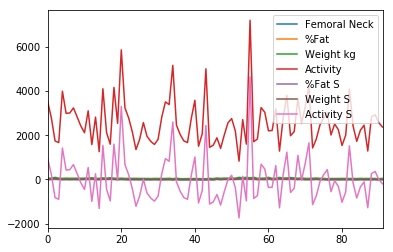

In [12]:
data.plot()

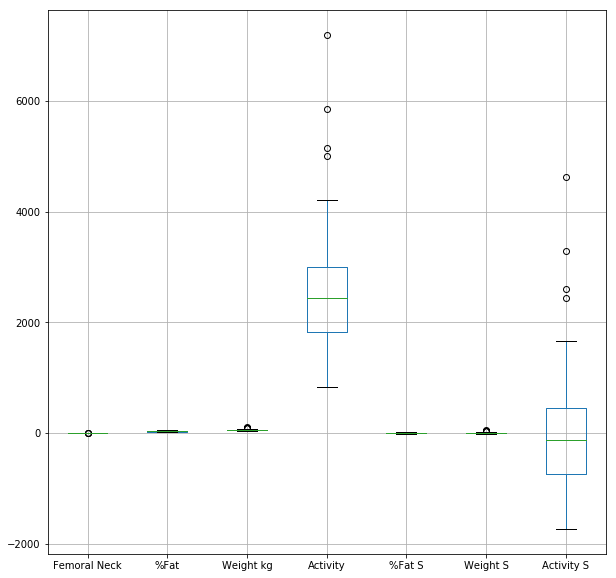

In [20]:
data.boxplot(figsize=(10,10))

In [25]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

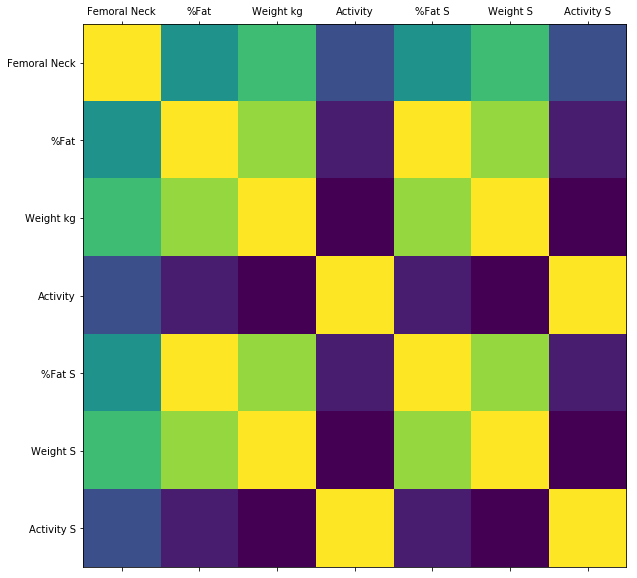

In [26]:
plot_corr(data)